In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Soda can problem
V0 = 330
SoverV0 = lambda r: 2/r + (2*np.pi * r**2) / V0

In [3]:
SoverV0(1)

2.019039955476302

In [4]:
r = np.linspace(0.2,20,300)
y = SoverV0(r)

Text(0, 0.5, 'Surface Volume Ratio (cm^-1)')

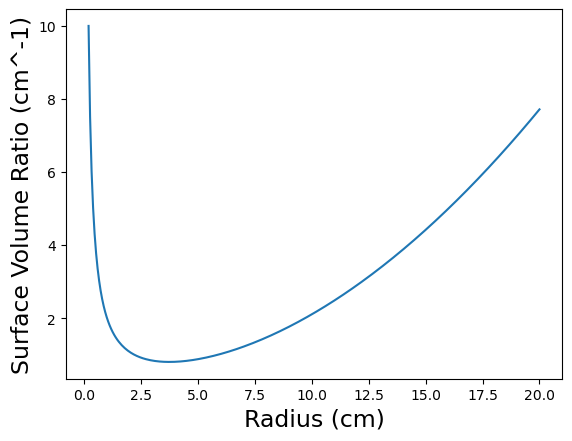

In [5]:
plt.plot(r,y)
plt.xlabel("Radius (cm)", fontsize=17)
plt.ylabel("Surface Volume Ratio (cm^-1)", fontsize=17)

In [29]:
import torch.nn as nn 

class SodaCan(nn.Module):
    def __init__(self, V0, lr=0.01):
        super(SodaCan, self).__init__()
        self.V0 = V0

        self.pi = torch.torch.acos(torch.zeros(1))*2  # no pi in torch :(
        
        self.R = torch.Tensor([20]) # Initialized to 10
        self.R.requires_grad = True # This is our variable (parameter of the model), gradients are turned ON

        self.lr = torch.Tensor([lr])
        self.lr.requires_grad = False # This is a constant, gradients are turn OFF

    def forward(self):
        # Forward pass

        SoverV = 2/self.R + 2*self.pi * self.R**2 / self.V0
        return SoverV
    
    def Do_a_step(self):

        gradSov = torch.autograd.grad(self(), self.R)
        self.R = self.R - self.lr * gradSov[0]
        
        return self.R.item(), gradSov[0].item(), self().item() 


In [30]:
s0v = SodaCan(V0 = 330, lr=0.5)

In [31]:
R = []
value = []
for epoch in range(400):
    newR, _ , f_in_R = s0v.Do_a_step()
    R.append(newR)
    value.append(f_in_R)

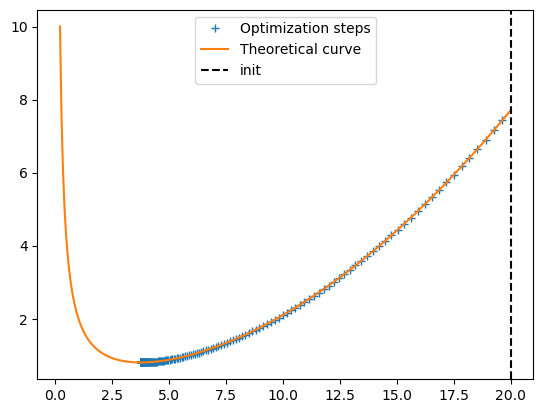

In [32]:
plt.plot(R,value,"+",label="Optimization steps")
plt.plot(r,y,label="Theoretical curve")
plt.axvline(20,linestyle="--",label="init",color="k")
plt.legend()